In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

print('done')

done


In [9]:
medications_df = pd.read_csv("datasets/medications.csv",encoding="ISO-8859-1")
examination_df = pd.read_csv("datasets/examination.csv", encoding="ISO-8859-1")
demographic_df = pd.read_csv("datasets/demographic.csv", encoding="ISO-8859-1")
labs_df = pd.read_csv("datasets/labs.csv", encoding="ISO-8859-1")
questionnaire_df = pd.read_csv("datasets/questionnaire.csv", encoding="ISO-8859-1")
diet_df = pd.read_csv("datasets/diet.csv", encoding="ISO-8859-1")

# df_combined = pd.merge(medications_df, examination_df, on='SEQN', how='outer')
# df_combined = pd.merge(df_combined, demographic_df, on='SEQN', how='outer')
# df_combined = pd.merge(df_combined, labs_df, on='SEQN', how='outer')
# df_combined = pd.merge(df_combined, questionnaire_df, on='SEQN', how='outer')
# df_combined = pd.merge(df_combined, diet_df, on='SEQN', how='outer')



print(medications_df.info())
print(examination_df.info())
print(demographic_df.info())
print(labs_df.info())
print(questionnaire_df.info())
print(diet_df.info())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20194 entries, 0 to 20193
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      20194 non-null  int64  
 1   RXDUSE    20194 non-null  int64  
 2   RXDDRUG   14100 non-null  object 
 3   RXDDRGID  14016 non-null  object 
 4   RXQSEEN   14019 non-null  float64
 5   RXDDAYS   14018 non-null  float64
 6   RXDRSC1   14022 non-null  object 
 7   RXDRSC2   714 non-null    object 
 8   RXDRSC3   127 non-null    object 
 9   RXDRSD1   13633 non-null  object 
 10  RXDRSD2   714 non-null    object 
 11  RXDRSD3   127 non-null    object 
 12  RXDCOUNT  14100 non-null  float64
dtypes: float64(3), int64(2), object(8)
memory usage: 2.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9813 entries, 0 to 9812
Columns: 224 entries, SEQN to CSAEFFRT
dtypes: float64(192), int64(3), object(29)
memory usage: 16.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10175

In [83]:

# in madication take all

#in examintions
useful_columns = [
    'SEQN',
    'PEASCST1', 'BPXCHR', 'BPXPULS', 'BPXPTY', 'BMXBMI', 'BMXWT', 'BMXHT', 
    'BMXWAIST', 'CSXSMKOD', 'CSXEXCMT', 'CSQ260A', 'CSQ460', 'CSQ470', 'CSQ480','CSQ450',
    'CSXEXSTS', 'CSXNAST', 'CSXSOAOD', 'BPXSY1', 'BPXDI1', 'BPAEN1', 'BPACSZ', 'BPAARM'
]

# Create a new DataFrame with the selected columns
examination_df = examination_df[useful_columns]

#in demographic
useful_columns = [
    'SEQN',
    'RIAGENDR', 'RIDAGEYR', 'RIDAGEMN', 'RIDRETH1', 'RIDRETH3',
    'DMDBORN4', 'DMDEDUC3', 'DMDEDUC2', 'DMDMARTL', 'RIDEXPRG', 'DMQMILIZ', 'DMQADFC',
    'DMDHHSIZ', 'DMDHHSZA', 'DMDHHSZB', 'DMDHHSZE', 'DMDHRGND', 'DMDHRAGE', 'DMDHRBR4',
    'DMDHSEDU', 'INDHHIN2', 'INDFMIN2', 'INDFMPIR',
    'WTINT2YR', 'WTMEC2YR', 'SDMVPSU', 'SDMVSTRA', 'SIALANG', 'SIAPROXY', 'SIAINTRP',
    'FIALANG', 'FIAPROXY', 'FIAINTRP', 'MIALANG', 'MIAPROXY', 'MIAINTRP', 'AIALANGA'
]

# Create a new DataFrame with the selected columns
demographic_df = demographic_df[useful_columns]

# in labs
useful_columns = [
    'SEQN',
    'URXUMA', 'URXUMS', 'URXUCR.x', 'URXCRS', 'LBXAPB', 'LBDAPBSI', 'LBXSAL',
    'LBDSALSI', 'LBXSAPSI', 'LBXSASSI', 'LBXSATSI', 'LBXSBU', 'LBDSBUSI', 'LBXHGB',
    'LBXHCT', 'LBXMCVSI', 'LBXMCHSI', 'LBXPLTSI', 'LBXMPSI', 'LBXSCA', 'LBDSCASI',
    'LBXSCH', 'PHQ020', 'PHACOFHR', 'PHACOFMN', 'GTDSCMMN', 'GTDDR1MN', 'GTXDRANK',
    'URXUCR', 'URXUIO', 'URXUPB', 'URXUSB', 'LBXBPB', 'LBDBPBSI', 'LBDBPBLC', 'LBXTC',
    'LBDTCSI', 'LBXEMA', 'LBXBMN', 'LBDBMNSI', 'LBDBMNLC', 'LBXHCR', 'LBXHCG', 'LBDHEG',
    'URXUP8', 'URDUP8LC', 'URXNO3', 'URDNO3LC', 'LBXIN', 'LBDINSI'
]

# Create a new DataFrame with the selected columns
labs_df = labs_df[useful_columns]

#in questionnaire
useful_columns = [
    'SEQN',
    'AUQ136',
    'ALQ101', 'ALQ110', 'ALQ120Q', 'ALQ120U', 'ALQ130','ALQ151',
    'CSQ010','CSQ040',
    'HIQ031B', 'HIQ031C',
    'BPQ020', 'BPQ030', 'BPD035', 'BPQ080', 'BPQ056','BPQ059',
    'HSD010',
    'HSQ500', 'HSQ520','HSQ571','HSAQUEX',
    'DIQ010', 'DIQ050', 'DIQ080','DIQ175A','DIQ160',
    'ACD011B', 'ACD011C', 'ACD040',
    'CDQ001', 'CDQ005', 'CDQ008','CDQ009A','CDQ009H',
    'CSQ140', 'CSQ200','CSQ202','CSQ250',
    'CBD070', 'CBD090', 'CBD110','CBD130',
    'CBQ611','CBQ550',
    'DEQ034A', 'DEQ034C',
    'DED120',
    'DLQ010', 'DLQ020', 
    'DPQ010','DPQ100',
    'DUQ200',
    'ECD010',
    'DBQ010','DBD030','DBQ073A','DBQ700',
    'DBD900',
    'FSD052','FSD041','FSDHH','FSDAD','FSD151',
    'ECQ020', 'ECD070A', 'ECQ080',
    'PFQ020', 'PFQ030', 'PFQ033','PFQ049','PFQ061A','PFQ061O','PFQ090',
    'MCQ080E', 'MCQ160A', 'MCQ180A','MCQ010','MCQ070','MCQ080','MCQ230A','MCQ240AA','MCQ240L','MCQ370A','MCQ300A',
    'OCD150','OCQ180','OCQ260','OCD270','OHQ030','OHQ770','OHQ780F','OHQ555G','OHQ565','OHQ580','OHQ620','OHQ870','OHQ900',
    'OSQ010A','OSQ020A','OSD030AA','OSD030BA','OSD050BB','OSQ040BF','OSQ040BH','OSQ080','OSQ120C','OSD110G','OSQ090H','OSQ150','OSQ170',
    'HEQ010','HEQ030',
    'HIQ011','HIQ260','HIQ270',
    'HOD050','HOQ065','HUQ010','HUQ041','HUQ051','HUD080',
    'IMQ011','IMQ040','IMQ090',
    'INQ020','INQ030',
    'IND235','INDFMMPI',
    'AGQ030',
    'PAQ605','PAD615','PAQ635','PAQ670','PAQ650','PAQ724B','PAQ724I','PAQ724O','PAQ731','PAQ762',
    'PAAQUEX','PUQ100',
    'RHQ010','RHQ060','RHQ076','RHQ160','RHD180','RHQ200','RHQ542A','RHQ570','RXQ510','RXQ520','RXD530',
    'SLQ050','SMQ020','SMQ040','SMD055','SMD650','SMD100BR','SMQ670','SMD460','SMQ858','SMQ870','SMAQUEX.x','SMQ710','SMQ690G','SMQ800','SMDANY',
    'SXQ700','SXD171','SXQ636','SXQ260','SXQ270','SXQ294',
    'WHD010','WHQ040','WHQ070',
    'WHD080A','WHD080C','WHD110','WHD140','WHQ150','WHQ520'
]

# Create a new dataframe
questionnaire_df = questionnaire_df[useful_columns]

#in diet
useful_columns = [
    'SEQN',
    'DR1TKCAL', 'DR1TPROT', 'DR1TCARB', 'DR1TSUGR', 'DR1TFIBE', 'DR1TTFAT', 'DR1TSFAT', 
    'DR1TMFAT', 'DR1TPFAT', 'DR1TCHOL', 'DR1TVB1', 'DR1TVB2', 'DR1TNIAC', 'DR1TVB6', 
    'DR1TVB12', 'DR1TVC', 'DR1TVD', 'DR1TVK', 'DR1TCALC', 'DR1TPHOS', 'DR1TMAGN', 
    'DR1TIRON', 'DR1TZINC', 'DR1TCOPP', 'DR1TSODI', 'DR1TPOTA', 'DR1TSELE', 'DR1DAY', 
    'DR1DBIH', 'DR1HELPD', 'DR1LANG', 'DRDINT'
]

# Create a new dataframe
diet_df = diet_df[useful_columns]




In [84]:
# merge all dataframes
df = pd.merge(medications_df, examination_df, on='SEQN', how='outer')
df = pd.merge(df, labs_df, on='SEQN', how='outer')
df = pd.merge(df, questionnaire_df, on='SEQN', how='outer')
df = pd.merge(df, diet_df, on='SEQN', how='outer')
df = pd.merge(df, demographic_df, on='SEQN', how='outer')

# drop SEQN column
df = df.drop('SEQN', axis=1)
print(df.info())
print(type(df))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20194 entries, 0 to 20193
Columns: 337 entries, RXDUSE to AIALANGA
dtypes: float64(309), int64(19), object(9)
memory usage: 51.9+ MB
None
<class 'pandas.core.frame.DataFrame'>


In [85]:
# Cleaning data
for column in df.columns:
    
    if df[column].dtype in ['float64', 'int64']:  
        df[column].fillna(df[column].mean(), inplace=True)  
    else:
        df[column].fillna(df[column].mode()[0], inplace=True)  

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20194 entries, 0 to 20193
Columns: 337 entries, RXDUSE to AIALANGA
dtypes: float64(309), int64(19), object(9)
memory usage: 51.9+ MB
None


C:\Users\Asus\AppData\Local\Temp\ipykernel_15316\225119423.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_15316\225119423.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [86]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20194 entries, 0 to 20193
Columns: 337 entries, RXDUSE to AIALANGA
dtypes: float64(309), int64(19), object(9)
memory usage: 51.9+ MB
None
RXDUSE      0
RXDDRUG     0
RXDDRGID    0
RXQSEEN     0
RXDDAYS     0
           ..
FIAINTRP    0
MIALANG     0
MIAPROXY    0
MIAINTRP    0
AIALANGA    0
Length: 337, dtype: int64


In [87]:

# Get all object columns
print(df.info())
object_columns = df.select_dtypes(include=['object']).columns
def hashing_encoder(col, num_buckets=10):
    return col.apply(lambda x: hash(x) % num_buckets)
# Apply hashing to each categorical column
num_buckets = 141  # Adjust the number of buckets as needed
for col in object_columns:
    df[col] = hashing_encoder(df[col], num_buckets)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20194 entries, 0 to 20193
Columns: 337 entries, RXDUSE to AIALANGA
dtypes: float64(309), int64(19), object(9)
memory usage: 51.9+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20194 entries, 0 to 20193
Columns: 337 entries, RXDUSE to AIALANGA
dtypes: float64(309), int64(28)
memory usage: 51.9 MB
None


In [92]:
print(df.head(5))

   RXDUSE  RXDDRUG  RXDDRGID   RXQSEEN      RXDDAYS  RXDRSC1  RXDRSC2  \
0       1       27        26  1.165276  3917.636039      125       74   
1       1       70         3  2.000000  1460.000000      111       74   
2       1       39        86  1.000000   243.000000       76       74   
3       1       17       103  1.000000   365.000000      111       74   
4       1       21        69  1.000000    14.000000       65       74   

   RXDRSC3  RXDRSD1  RXDRSD2  ...  SIALANG  SIAPROXY  SIAINTRP  FIALANG  \
0       76       12       87  ...        1       2.0         2      1.0   
1       76       91       87  ...        1       2.0         2      1.0   
2       76       26       87  ...        1       2.0         2      1.0   
3       76       91       87  ...        1       2.0         2      1.0   
4       76        0       87  ...        1       2.0         2      1.0   

   FIAPROXY  FIAINTRP  MIALANG  MIAPROXY  MIAINTRP  AIALANGA  
0       2.0       2.0      1.0       2.0       

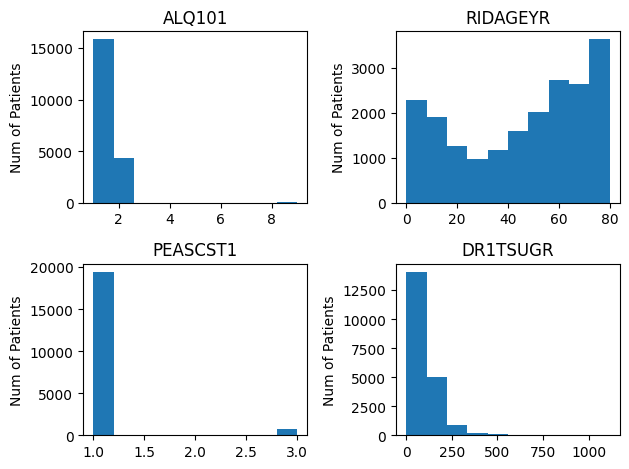

In [99]:
# RIDAGEYR is age in year , PEASCST1 id blood pressure , DR1TSUGR is sugar, ALQ101 is alcohol 
cols = ['ALQ101','RIDAGEYR','PEASCST1','DR1TSUGR']

fig, ax = plt.subplots(2, 2)
for i, col in enumerate(cols):
    ax[i//2, i%2].hist(df[col])
    ax[i//2, i%2].set_title(col)
    ax[i//2, i%2].set_ylabel("Num of Patients")
plt.tight_layout()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20194 entries, 0 to 20193
Columns: 2044 entries, SEQN to RXDRSD3_Wheezing
dtypes: bool(2038), float64(3), int64(3)
memory usage: 40.2 MB
None
